In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def plot_img_table(imgs, names, title):
    nrows = imgs.shape[0]
    ncols = imgs.shape[1]
    fig, ax = plt.subplots(nrows, ncols, figsize=(8, 8))
    fig.canvas.manager.set_window_title(title)
    for i in range(nrows):
        for j in range(ncols):
            ax[i, j].imshow(imgs[i, j][:, :, ::-1])
            ax[i, j].title.set_text(names[i, j])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    plt.tight_layout()

In [5]:
def drawCornersH(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    cornersH = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    cornersH = cv.dilate(cornersH, None)
    imgH = img.copy()
    imgH[cornersH > 0.1 * cornersH.max()] = [0, 0, 255]  # Threshold for an optimal value
    return imgH

In [6]:
def drawCornersST(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    cornersST = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=9).squeeze(1)
    imgST = img.copy()
    for c in cornersST:
        cv.circle(imgST, (int(c[0]), int(c[1])), 4, (0, 0, 255), -1)
    return imgST

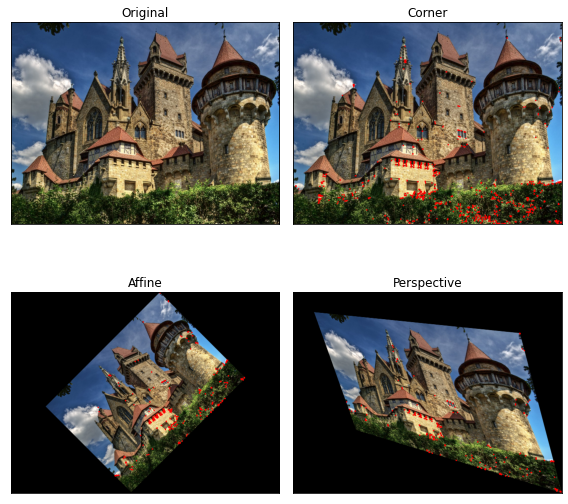

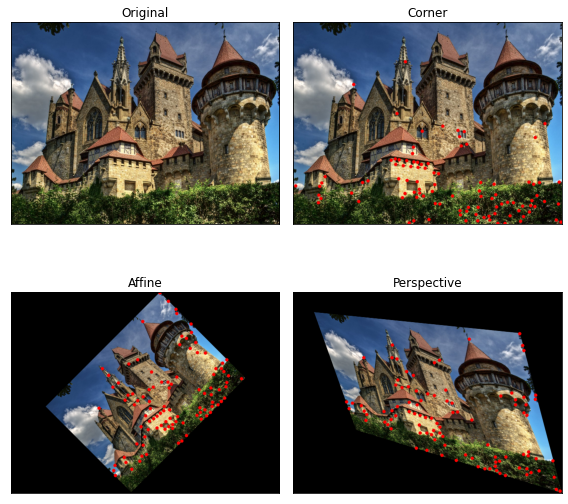

In [ ]:
img = cv.imread("castle.jpeg")
img = cv.resize(img, (640, 480))
height, width = img.shape[:2]
center = (width / 2, height / 2)

orig_img_H = drawCornersH(img)
orig_img_ST = drawCornersST(img)

rot_mat = cv.getRotationMatrix2D(center=center, angle=45, scale=0.6)
aff_img = cv.warpAffine(img, rot_mat, (width, height))
aff_img_H = drawCornersH(aff_img)
aff_img_ST = drawCornersST(aff_img)

pts1 = np.float32([[0, 0], [0, height], [width, height], [width, 0]])
pts2 = np.float32([[50, 50], [150, height-150], [width, height], [width-100, 100]])
p_mat = cv.getPerspectiveTransform(pts1, pts2)
p_img = cv.warpPerspective(img, p_mat, (640, 480))
p_img_H = drawCornersH(p_img)
p_img_ST = drawCornersST(p_img)

names = np.array([['Original', 'Corner'], ['Affine', 'Perspective']])
imgs_H = np.array([[img, orig_img_H], [aff_img_H, p_img_H]])
imgs_ST = np.array([[img, orig_img_ST], [aff_img_ST, p_img_ST]])
plot_img_table(imgs_H, names, title="Harris")
plot_img_table(imgs_ST, names, title="Shi-Tomasi")

plt.show()
cv.waitKey(0)